In [2]:
import datetime as datetime
import numpy as np
import pandas_datareader as pdr
import pandas as pd

In [26]:
#Importing Data  1950-1999

start = datetime.datetime (1950, 1, 1)
end = datetime.datetime (1999, 10, 1)

fred_gdp = pdr.DataReader(['GDPC1'], 'fred', start, end)

fred_gdp.tail(12)

,GDPC1
DATE,
1997-01-01,11291.665
1997-04-01,11479.330
1997-07-01,11622.911
1997-10-01,11722.722
1998-01-01,11839.876
1998-04-01,11949.492
1998-07-01,12099.191
1998-10-01,12294.737
1999-01-01,12410.778


In [27]:
#adding natural logs to data

fred_gdp['Natural Logs'] = np.log(fred_gdp['GDPC1'])


print(fred_gdp)

                GDPC1  Natural Logs
DATE                               
1950-01-01   2186.365      7.689996
1950-04-01   2253.045      7.720038
1950-07-01   2340.112      7.757954
1950-10-01   2384.920      7.776921
1951-01-01   2417.311      7.790411
...               ...           ...
1998-10-01  12294.737      9.416927
1999-01-01  12410.778      9.426321
1999-04-01  12514.408      9.434636
1999-07-01  12679.977      9.447779
1999-10-01  12888.281      9.464074

[200 rows x 2 columns]


In [29]:
#Here is where we create the trendline

x = np.arange(fred_gdp['Natural Logs'].size)


In [30]:
slope = int
intercept = int
fit = np.polyfit(x, fred_gdp['Natural Logs'], deg=1)
slope = fit[0]
intercept = fit[1]

In [31]:
months = []
for i in range(1,len(fred_gdp.index)+1):
    months.append(intercept + slope * i)
    
    

In [32]:
months

[7.793207915123262,
 7.801621242363632,
 7.810034569604001,
 7.818447896844371,
 7.82686122408474,
 7.83527455132511,
 7.843687878565479,
 7.852101205805849,
 7.860514533046218,
 7.868927860286588,
 7.877341187526957,
 7.885754514767327,
 7.894167842007696,
 7.902581169248066,
 7.910994496488435,
 7.919407823728805,
 7.927821150969174,
 7.936234478209544,
 7.944647805449913,
 7.953061132690283,
 7.961474459930652,
 7.969887787171022,
 7.978301114411391,
 7.98671444165176,
 7.99512776889213,
 8.0035410961325,
 8.011954423372869,
 8.020367750613238,
 8.028781077853607,
 8.037194405093977,
 8.045607732334346,
 8.054021059574715,
 8.062434386815085,
 8.070847714055455,
 8.079261041295824,
 8.087674368536193,
 8.096087695776562,
 8.104501023016933,
 8.112914350257302,
 8.121327677497671,
 8.12974100473804,
 8.13815433197841,
 8.14656765921878,
 8.15498098645915,
 8.163394313699518,
 8.171807640939887,
 8.180220968180258,
 8.188634295420627,
 8.197047622660996,
 8.205460949901365,
 8.2138742

In [33]:
fred_gdp['Linear Trend'] = months

In [34]:
fred_gdp

,GDPC1,Natural Logs,Linear Trend
DATE,,,
1950-01-01,2186.365,7.689996,7.793208
1950-04-01,2253.045,7.720038,7.801621
1950-07-01,2340.112,7.757954,7.810035
1950-10-01,2384.920,7.776921,7.818448
1951-01-01,2417.311,7.790411,7.826861
...,...,...,...
1998-10-01,12294.737,9.416927,9.433807
1999-01-01,12410.778,9.426321,9.442220
1999-04-01,12514.408,9.434636,9.450633


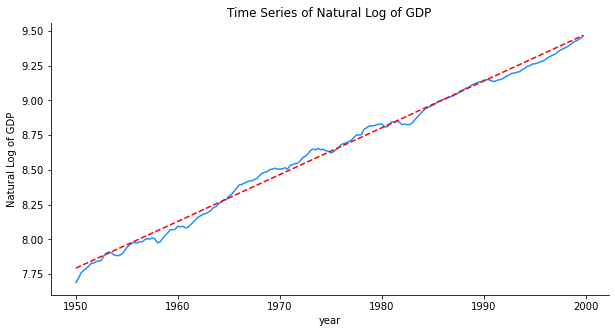

In [37]:
#Graph for Natural Log 1950-1999

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(fred_gdp.index, fred_gdp['Natural Logs'],color = 'dodgerblue')
ax.plot(fred_gdp.index, fred_gdp['Linear Trend'],color = 'red', linestyle = '--')

ax.set_title('Time Series of Natural Log of GDP')
ax.set_ylabel('Natural Log of GDP')
ax.set_xlabel('year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Create Point Forecast 

In [38]:
dates = pd.date_range(start="2000-01-01",end="2019-10-01", freq = 'QS')
len(dates)

80

In [39]:
forecasted_fred = []
for i in range(200,280):
    forecasted_fred.append(intercept + slope * i)
    
len(forecasted_fred)

80

In [40]:
forecasted_data = pd.DataFrame({'Dates':dates, 'Forecast':forecasted_fred})
forecasted_data = forecasted_data.set_index('Dates')

forecasted_data

,Forecast
Dates,
2000-01-01,9.467460
2000-04-01,9.475873
2000-07-01,9.484287
2000-10-01,9.492700
2001-01-01,9.501113
...,...
2018-10-01,10.098460
2019-01-01,10.106873
2019-04-01,10.115286


Create 95% Interval Forecast

In [42]:
from statistics import stdev

In [43]:
forecasted_data['Lower Bound'] = forecasted_data['Forecast'] - 1.96 * stdev(forecasted_data['Forecast'])
forecasted_data['Upper Bound'] = forecasted_data['Forecast'] + 1.96 * stdev(forecasted_data['Forecast'])

forecasted_data

,Forecast,Lower Bound,Upper Bound
Dates,,,
2000-01-01,9.467460,9.084264,9.850656
2000-04-01,9.475873,9.092678,9.859069
2000-07-01,9.484287,9.101091,9.867482
2000-10-01,9.492700,9.109504,9.875896
2001-01-01,9.501113,9.117918,9.884309
...,...,...,...
2018-10-01,10.098460,9.715264,10.481655
2019-01-01,10.106873,9.723677,10.490069
2019-04-01,10.115286,9.732090,10.498482


Graph Point and Interval Forecast

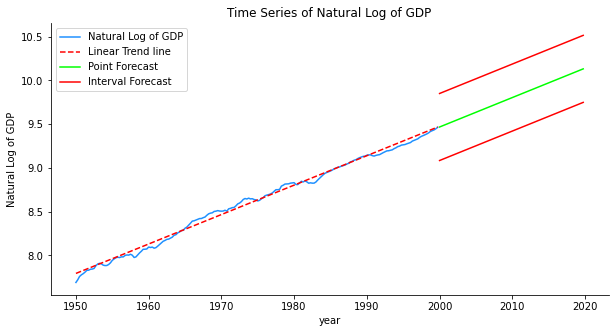

In [49]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(fred_gdp.index, fred_gdp['Natural Logs'],color = 'dodgerblue', label = 'Natural Log of GDP')
ax.plot(fred_gdp.index, fred_gdp['Linear Trend'],color = 'red', linestyle = '--', label = 'Linear Trend line')
ax.plot(forecasted_data.index, forecasted_data['Forecast'],color = 'lime', label = 'Point Forecast')
ax.plot(forecasted_data.index, forecasted_data['Upper Bound'],color = 'red', linestyle = '-',label = 'Interval Forecast')
ax.plot(forecasted_data.index, forecasted_data['Lower Bound'],color = 'red', linestyle = '-')

ax.set_title('Time Series of Natural Log of GDP')
ax.set_ylabel('Natural Log of GDP')
ax.set_xlabel('year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()

Convert Point Forecast back to Real GDP

In [45]:
import math as math

In [46]:
forecasted_data_2026 = forecasted_data[forecasted_data.index >= '2019-01-01']
forecasted_data_2026['Real GDP Exp'] = forecasted_data_2026['Forecast'].apply(np.exp)

forecasted_data_2026

<ipython-input-46-659de2ddfe9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_data_2026['Real GDP Exp'] = forecasted_data_2026['Forecast'].apply(np.exp)


,Forecast,Lower Bound,Upper Bound,Real GDP Exp
Dates,,,,
2019-01-01,10.106873,9.723677,10.490069,24510.892908
2019-04-01,10.115286,9.732090,10.498482,24717.981000
2019-07-01,10.123700,9.740504,10.506895,24926.818741
2019-10-01,10.132113,9.748917,10.515309,25137.420914
